In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file on Google Drive
file_path = '/content/drive/MyDrive/Chap_3/dataset_normal_and_abnormal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the header of the DataFrame
print(df.head())


Mounted at /content/drive
     motion    change    distance     Label
0  4.373570  0.483224   88.709425    normal
1  7.280921  0.297178   43.169311    normal
2  5.768075  0.552126   33.570048    normal
3  6.574027  1.707691  105.837245  abnormal
4  7.845483  0.783528   89.488512    normal


Mounted at /content/drive
Header of the dataset:
     motion    change    distance     Label
0  4.373570  0.483224   88.709425    normal
1  7.280921  0.297178   43.169311    normal
2  5.768075  0.552126   33.570048    normal
3  6.574027  1.707691  105.837245  abnormal
4  7.845483  0.783528   89.488512    normal


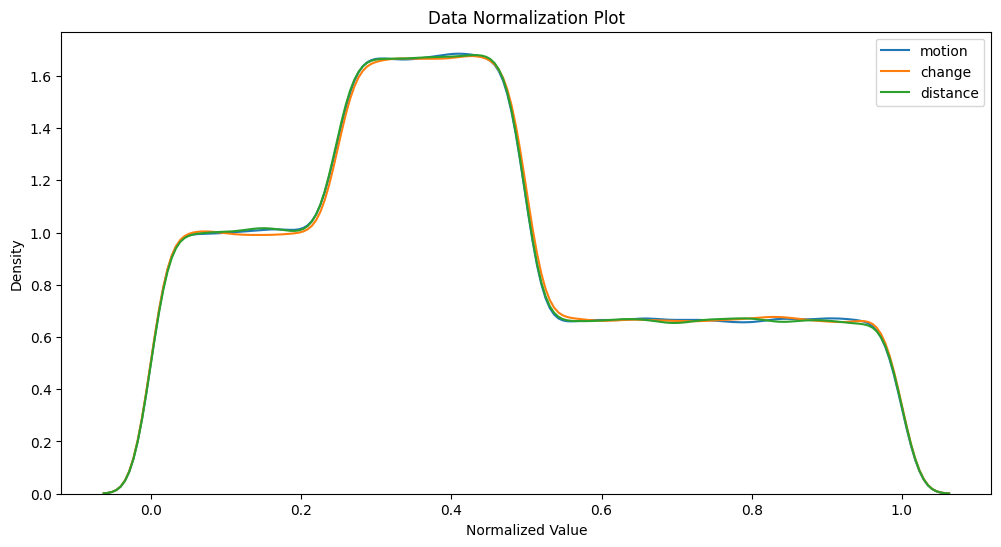

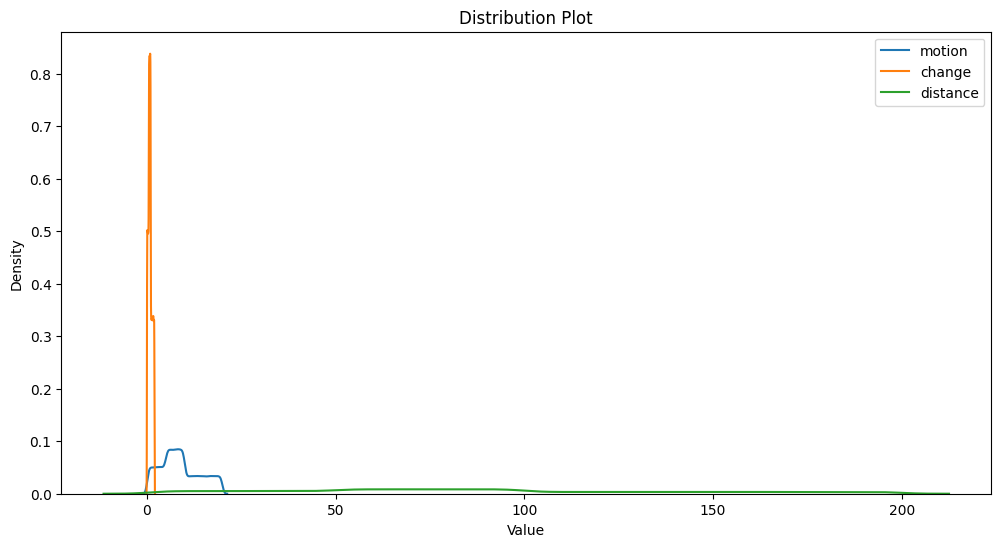

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 #Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the CSV file on Google Drive
file_path = '/content/drive/MyDrive/Chap_3/dataset_normal_and_abnormal.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the header of the DataFrame
print("Header of the dataset:")
print(df.head())

# Data normalization
df_normalized = df.copy()
features = ['motion', 'change', 'distance']
for feature in features:
    df_normalized[feature] = (df_normalized[feature] - df_normalized[feature].min()) / (df_normalized[feature].max() - df_normalized[feature].min())

# Plot data normalization
plt.figure(figsize=(12, 6))
for feature in features:
    sns.kdeplot(df_normalized[feature], label=feature)
plt.title('Data Normalization Plot')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot distribution
plt.figure(figsize=(12, 6))
for feature in features:
    sns.kdeplot(df[feature], label=feature)
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Save the normalized DataFrame to a CSV file
df_normalized.to_csv('/content/drive/MyDrive/Chap_3/dataset_normalized.csv', index=False)
# Save dataframe to CSV
csv_file = 'dataset_normalized.csv'
df_normalized.to_csv(csv_file, index=False)
# Display the head of the CSV file
print(df.head())

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Value Counts
print("\nValue Counts of Class Labels:")
print(df['Label'].value_counts())

# Pairwise Correlation (excluding 'Label' column)
print("\nPairwise Correlation:")
correlation_matrix = df.drop(columns='Label').corr()
print(correlation_matrix)

Descriptive Statistics:
              motion         change       distance
count  310000.000000  310000.000000  310000.000000
mean        8.784269       0.875173      87.766565
std         5.226261       0.525790      52.216756
min         0.100128       0.000001       1.000021
25%         5.037703       0.500229      50.377209
50%         8.026560       0.800581      80.206819
75%        12.514153       1.250283     124.934573
max        19.999974       1.999999     199.999138

Value Counts of Class Labels:
Label
normal      155000
abnormal    155000
Name: count, dtype: int64

Pairwise Correlation:
            motion    change  distance
motion    1.000000  0.509585  0.507403
change    0.509585  1.000000  0.508124
distance  0.507403  0.508124  1.000000


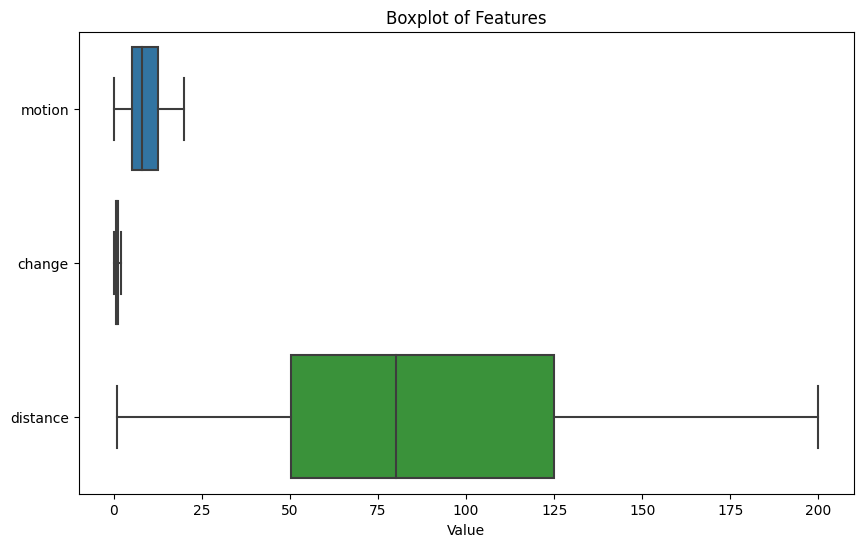

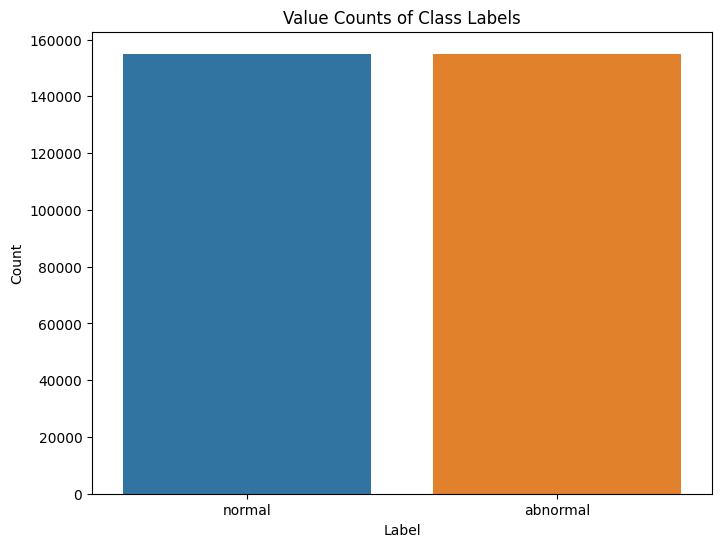

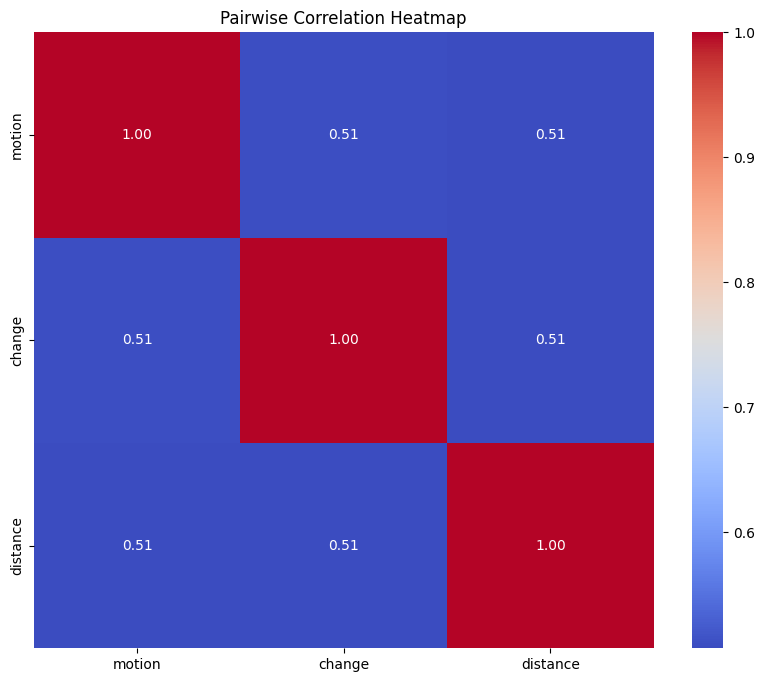

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns='Label'), orient='h')
plt.title('Boxplot of Features')
plt.xlabel('Value')
plt.show()

# Value Counts of Class Labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label')
plt.title('Value Counts of Class Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Pairwise Correlation (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()


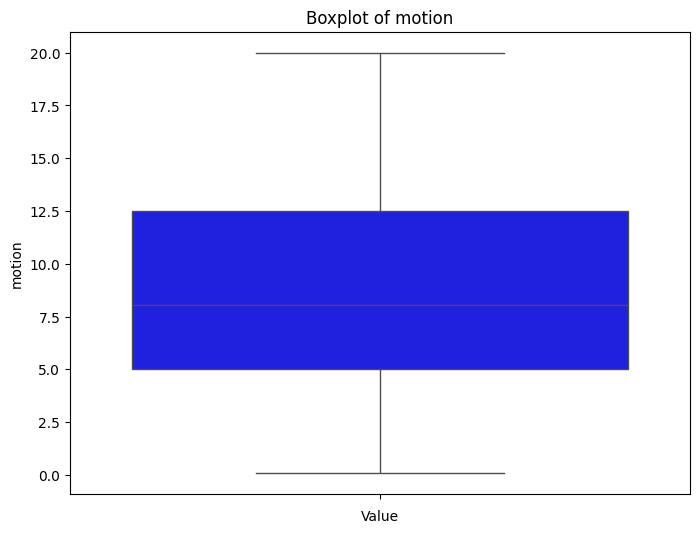

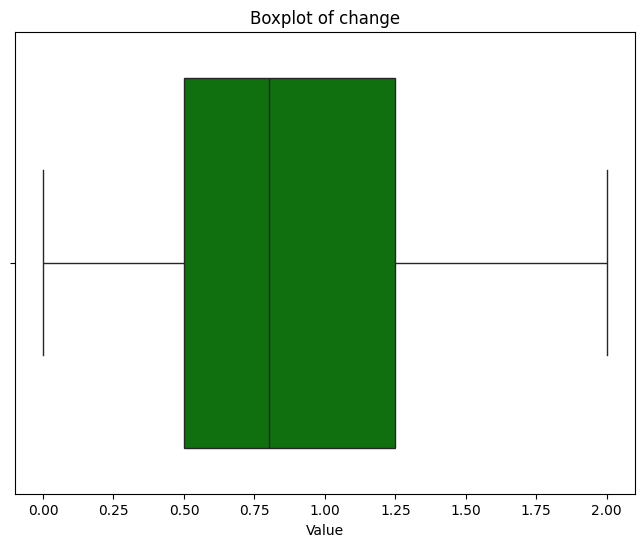

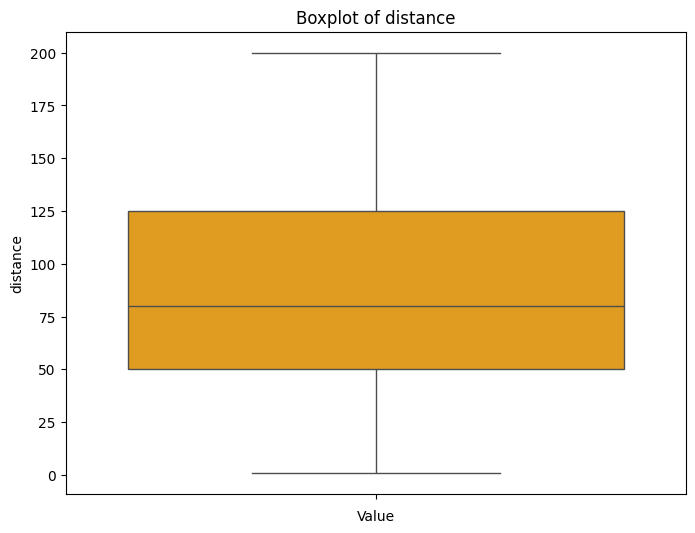

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of motion with color 'blue'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['motion'], orient='k', color='blue')
plt.title('Boxplot of motion')
plt.xlabel('Value')
plt.show()

# Boxplot of change with color 'green'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['change'], orient='h', color='green')
plt.title('Boxplot of change')
plt.xlabel('Value')
plt.show()

# Boxplot of distance with color 'orange'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['distance'], orient='p', color='orange')
plt.title('Boxplot of distance')
plt.xlabel('Value')
plt.show()


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset_normal_and_abnormal.csv')

# Function to calculate the sum of all features
def calculate_sum_of_features(solution):
    return np.sum(solution)

# Function to apply Grey Wolf Optimization to maximize the sum of features
def grey_wolf_optimization(obj_function, num_features, num_iter=100, num_wolves=5):
    wolves_positions = np.random.rand(num_wolves, num_features)
    best_solution = None
    best_fitness = float('-inf')
    fitness_history = []

    for _ in range(num_iter):
        alpha_position = wolves_positions[np.argmax([obj_function(w) for w in wolves_positions])]
        beta_position = wolves_positions[np.argsort([obj_function(w) for w in wolves_positions])[-2]]
        delta_position = wolves_positions[np.argsort([obj_function(w) for w in wolves_positions])[-1]]

        for i in range(num_wolves):
            a = 2 * (np.random.rand(num_features) - 0.5)
            r1 = np.random.rand(num_features)
            r2 = np.random.rand(num_features)

            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha_position - wolves_positions[i])
            X1 = alpha_position - A1 * D_alpha

            a = 2 * (np.random.rand(num_features) - 0.5)
            r1 = np.random.rand(num_features)
            r2 = np.random.rand(num_features)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta_position - wolves_positions[i])
            X2 = beta_position - A2 * D_beta

            a = 2 * (np.random.rand(num_features) - 0.5)
            r1 = np.random.rand(num_features)
            r2 = np.random.rand(num_features)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta_position - wolves_positions[i])
            X3 = delta_position - A3 * D_delta

            wolves_positions[i] = (X1 + X2 + X3) / 3

        for w in wolves_positions:
            fitness = obj_function(w)
            if fitness > best_fitness:
                best_solution = w
                best_fitness = fitness

        fitness_history.append(best_fitness)

    return best_solution, best_fitness, fitness_history

# Calculate the sum of features before optimization
sum_of_features_before = calculate_sum_of_features(df)

# Apply Grey Wolf Optimization to maximize the sum of features
best_solution, best_fitness, fitness_history = grey_wolf_optimization(calculate_sum_of_features, num_features=len(df.columns) - 1)

# Plot the fitness history (evolution) during optimization
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, color='blue')
plt.title('Fitness Evolution During Optimization')
plt.xlabel('Iteration')
plt.ylabel('Fitness (Sum of Features)')
plt.grid(True)
plt.show()

# Update the dataframe with the optimized solution
df_optimized = df.copy()
df_optimized[df_optimized.columns[:-1]] = best_solution

# Calculate the sum of features after optimization
sum_of_features_after = calculate_sum_of_features(df_optimized)

# Plot the values before and after optimization in the same figure
plt.figure(figsize=(10, 6))
plt.bar(np.arange(2), [sum_of_features_before, sum_of_features_after], color=['orange', 'green'])
plt.xticks(np.arange(2), ['Before Optimization', 'After Optimization'])
plt.title('Sum of Features Before and After Optimization')
plt.ylabel('Sum of Features')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

# Load the normalized dataset
df_normalized = pd.read_csv('dataset_normalized.csv')

# Split features and labels
X = df_normalized.drop(columns='Label')
y = df_normalized['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='abnormal')
f1 = f1_score(y_test, y_pred, pos_label='abnormal')

# Plot accuracy, precision, and F1-score
plt.figure(figsize=(12, 6))
sns.barplot(x=['Accuracy', 'Precision', 'F1-score'], y=[accuracy, precision, f1])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the optimized merged CSV file
file_path = '/content/drive/MyDrive/Chap_3/dataset_normalized.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Assuming your target variable is in the last column, you can split features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target variable

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(40, 20), max_iter=100)

# Train the model
mlp.fit(X_train, y_train)

# Predict the test set results
y_pred = mlp.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC Curve
y_prob = mlp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)


Accuracy: 0.9791827956989247


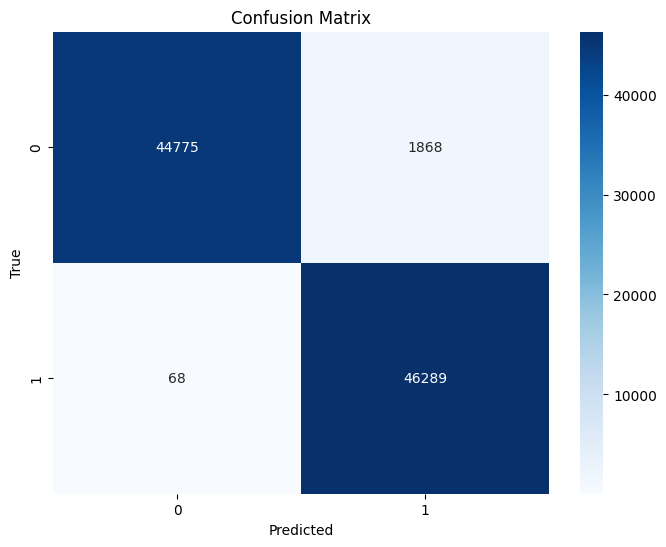

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC Curve
y_prob = mlp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)



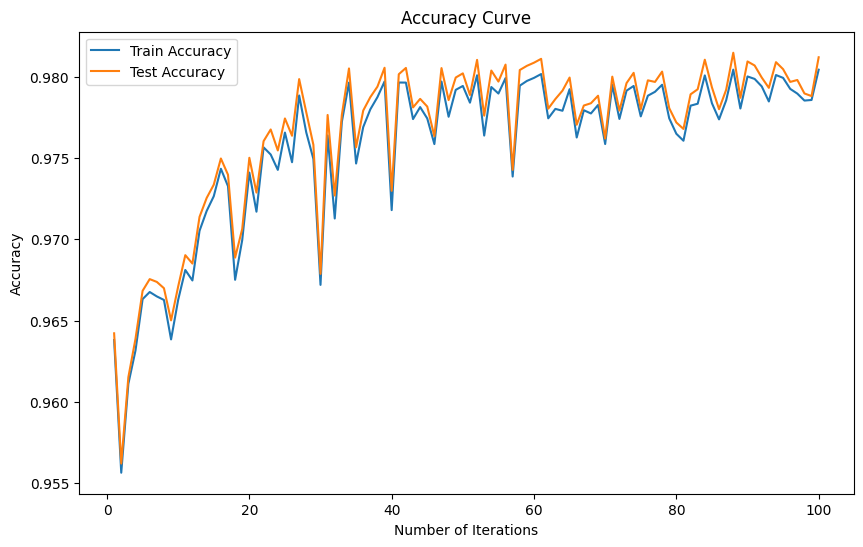

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the optimized merged CSV file
file_path = '/content/drive/MyDrive/Chap_3/dataset_normal_and_abnormal.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Assuming your target variable is in the last column, you can split features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target variable

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=100)

# Train the model and store accuracy values
train_accuracies = []
test_accuracies = []
for i in range(1, 101):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(accuracy_score(y_train, mlp.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, mlp.predict(X_test)))

# Plot accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 101), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()


In [ ]:
#appling RF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Load the CSV file
file_path = '/content/drive/MyDrive/Chap_3/dataset_normal_and_abnormal.csv'
data = pd.read_csv(file_path)
print(data.columns)

# Assuming your data has features and labels
X = data.drop(columns=['Label'])  # Features
y = data['Label']  # Labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Make predictions
predictions = rf_classifier.predict(X_test)
# Calculate evaluation metrics
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
# Precision and Recall
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
# Precision and Recall in table format
precision_recall_df = pd.DataFrame({'Class': rf_classifier.classes_, 'Precision': precision, 'Recall': recall})
print(precision_recall_df)


Index(['motion', 'change', 'distance', 'Label'], dtype='object')
0.9795125448028674
      Class  Precision    Recall
0  abnormal   0.993733  0.965063
1    normal   0.966120  0.993928


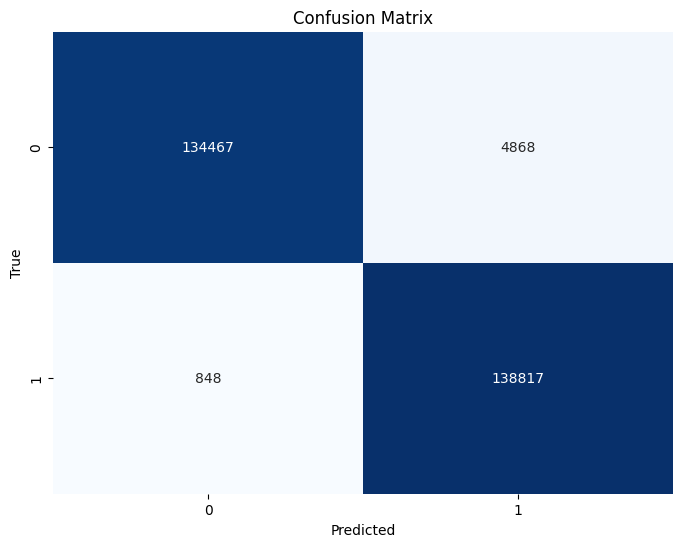

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# Confusion matrix of RF
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Index(['motion', 'change', 'distance', 'Label'], dtype='object')


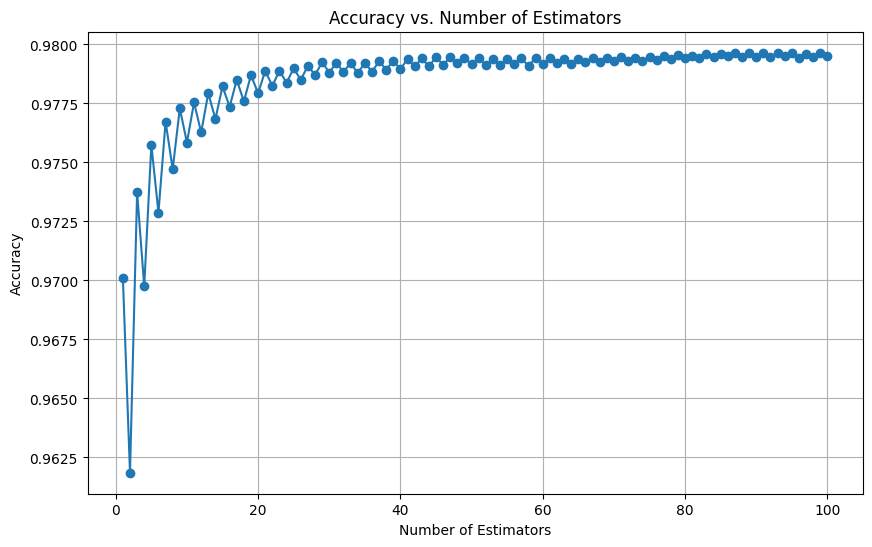

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the CSV file
file_path = '/content/drive/MyDrive/Chap_3/dataset_normal_and_abnormal.csv'
data = pd.read_csv(file_path)
print(data.columns)

# Assuming your data has features and labels
X = data.drop(columns=['Label'])  # Features
y = data['Label']  # Labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)

# Initialize lists to store accuracy for different number of estimators
accuracies = []
estimator_range = range(1, 101)

# Iterate over different number of estimators
for n_estimators in estimator_range:
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=1)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    predictions = rf_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()
